In [42]:
#Libraries used
import pandas as pd
import numpy as np
import random as rnd

In [43]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# machine learning Algorithms
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [45]:
train_df = pd.read_csv('C:/Users/Rathore/Downloads/titanic/train.csv')
test_df = pd.read_csv('C:/Users/Rathore/Downloads/titanic/test.csv')
combine = [train_df, test_df]


In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
train_df.info()
print("#"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [48]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wright, Mr. George",male,347082,B96 B98,S
freq,1,577,7,4,644


In [50]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by ='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [51]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [52]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [53]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


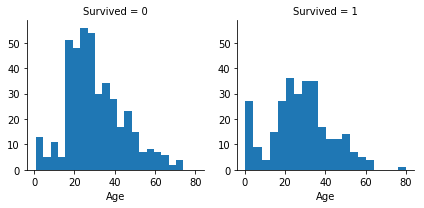

In [54]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
g = sns.FacetGrid(train_df,col = 'Survived')
g.map(plt.hist,'Age' ,bins= 20)

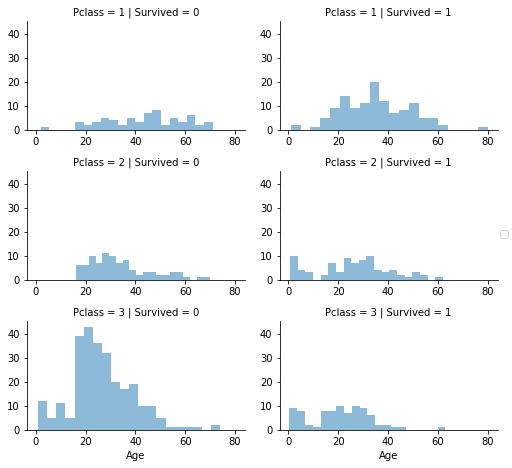

In [55]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

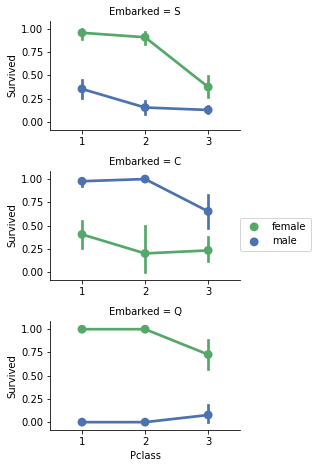

In [56]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


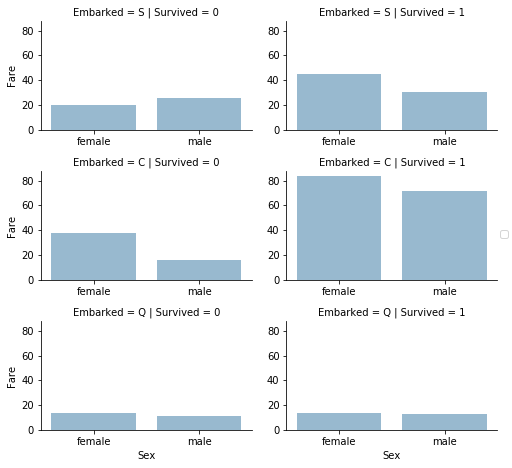

In [57]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [58]:
for dataset in combine:
    print(dataset.columns)
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df =combine[0]
test_df = combine[1]
pd.crosstab(train_df['Title'], train_df['Sex'])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [59]:
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].replace('Mlle','Miss')
    dataset["Title"] = dataset["Title"].replace('Ms','Miss')
    dataset["Title"] = dataset["Title"].replace('Mme',"Mrs")
train_df = combine[0]
test_df = combine[1]
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [60]:
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = combine[0]
test_df = combine[1]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [61]:
combine[0] = combine[0].drop(['Name', 'PassengerId','Ticket','Cabin'], axis=1)
combine[1] = combine[1].drop(['Name','Ticket','Cabin'], axis=1)
train_df =combine[0]
test_df  = combine[1]
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3


In [62]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0})
combine[0].head()   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [63]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(30)




In [64]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine[0].head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [65]:
for dataset in combine:
    dataset['Embarked']= dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map({'S':1,'C':2,'Q':3})
combine[0].head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,1,1
1,1,1,1,2.0,1,0,71.2833,2,3
2,1,3,1,1.0,0,0,7.9250,1,2
3,1,1,1,2.0,1,0,53.1000,1,3
4,0,3,0,2.0,0,0,8.0500,1,1


In [66]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
combine[0].head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,0,1,1
1,1,1,1,2.0,1,0,3,2,3
2,1,3,1,1.0,0,0,1,1,2
3,1,1,1,2.0,1,0,3,1,3
4,0,3,0,2.0,0,0,1,1,1


In [67]:
for dataset in combine:
    dataset['Family'] = dataset['SibSp']+dataset['Parch'] + 1
combine[0] = combine[0].drop(['SibSp','Parch'], axis=1)
combine[1] = combine[1].drop(['SibSp','Parch'], axis=1)
train_df =combine[0]
test_df  = combine[1]
train_df.head(2)    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0,3,0,1.0,0,1,1,2
1,1,1,1,2.0,3,2,3,2


In [68]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] ==1, 'IsAlone'] = 1
combine[0].head()    

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family,IsAlone
0,0,3,0,1.0,0,1,1,2,0
1,1,1,1,2.0,3,2,3,2,0
2,1,3,1,1.0,1,1,2,1,1
3,1,1,1,2.0,3,1,3,2,0
4,0,3,0,2.0,1,1,1,1,1


In [69]:
combine[1].head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family,IsAlone
0,892,3,0,2.0,0,3,1,1,1
1,893,3,1,2.0,0,1,3,2,0
2,894,2,0,3.0,1,3,1,1,1
3,895,3,0,1.0,1,1,1,1,1
4,896,3,1,1.0,1,1,3,3,0


In [70]:
#TrainTestSplit
df_train = combine[0].sample(frac=0.7,random_state = 43)
df_test = combine[0].loc[~combine[0].index.isin(df_train.index)]
train_x = df_train.drop('Survived',axis=1)
test_x = df_test.drop('Survived',axis = 1)
train_y = df_train['Survived']
test_y = df_test['Survived']
train_x.shape,test_x.shape,train_y.shape,test_y.shape


((624, 8), (267, 8), (624,), (267,))

In [71]:
#logisticregression
log = LogisticRegression()
log.fit(train_x,train_y)
y=log.predict(test_x)
acc_log = accuracy_score(test_y,y)

In [72]:
#SVM
svc = SVC()
svc.fit(train_x,train_y)
y=svc.predict(test_x)
acc_svc = accuracy_score(test_y,y)

In [73]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(train_x,train_y)
y = knn.predict(test_x)
acc_knn = accuracy_score(test_y,y)

In [74]:
#gaussian naive bayes
gaussian = GaussianNB()
gaussian.fit(train_x,train_y)
y = gaussian.predict(test_x)
acc_gaussian = accuracy_score(test_y,y)

In [75]:
#Decision Tree
ds = DecisionTreeClassifier()
ds.fit(train_x,train_y)
y= ds.predict(test_x )
acc_ds =accuracy_score(test_y,y)

In [76]:
#RandomForest
random = RandomForestClassifier(n_estimators =100)
random.fit(train_x,train_y)
y = random.predict(test_x)
acc_random = accuracy_score(test_y,y)

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'], 
              
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random, acc_gaussian, acc_ds]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.846442
3,Random Forest,0.835206
5,Decision Tree,0.827715
2,Logistic Regression,0.823970
4,Naive Bayes,0.823970
1,KNN,0.786517
